<a href="https://colab.research.google.com/github/Jungseunggi/Section3-project/blob/main/ds_cs_N421a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://user-images.githubusercontent.com/6457691/90080969-0f758d00-dd47-11ea-8191-fa12fd2054a7.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 4 / SPRINT 1 / NOTE 1 - assignmnet*

---





# N411. 퍼셉트론(Perceptron)과 인공신경망(Artificial Neural Networks) 과제

## 단층 퍼셉트론

이진분류 태스크를 위한 예시 데이터를 생성해보겠습니다. X 데이터는 (x좌표, y좌표)로 이루어져 있으며, 타겟 데이터는 0과 1로 이루어져 있습니다.

아래의 예시 생성 부분이 당장 이해 안가도 괜찮습니다. 넘파이를 활용해, 이런 다양한 일들을 할 수 있다는 점을 알아두시고, 궁금하신 분은 나중에 더 찾아보세요.

- np.append, np.vstack, np.hstack의 각각의 차이점에 대해 더 찾아보세요!

In [1]:
!pip install --upgrade pandas
!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


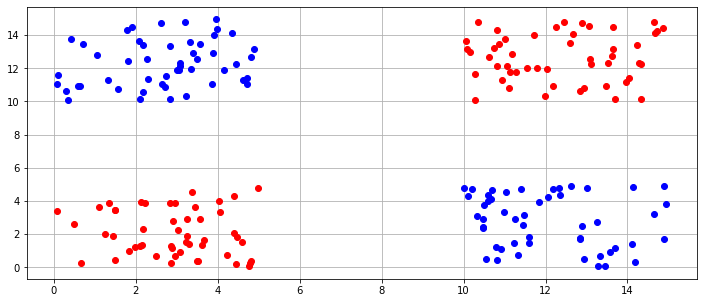

In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

x11 = np.random.uniform(low=0, high=5, size=(50,))
x12 = np.random.uniform(low=10, high=15, size=(50,))
x21 = np.random.uniform(low=0, high=5, size=(50,))
x22 = np.random.uniform(low=10, high=15, size=(50,))
# 균등분포로 부터 무작위 표본 추출

x1 = np.append(x11, x12)
x2 = np.append(x21, x22)
# x11뒤에 x12추가

y11 = np.random.uniform(low=10, high=15, size=(50,))
y12 = np.random.uniform(low=0, high=5, size=(50,))
y21 = np.random.uniform(low=0, high=5, size=(50,))
y22 = np.random.uniform(low=10, high=15, size=(50,))

y1 = np.append(y11, y12)
y2 = np.append(y21, y22)

x_1 = np.vstack([x1, y1]).T
x_2 = np.vstack([x2, y2]).T
y_1 = np.ones_like(x_1[:, 0])
y_2 = np.zeros_like(x_2[:, 0])
x = np.vstack([x_1, x_2])
y = np.hstack([y_1, y_2])
# vstack 배열을 세로로 결합할 때 사용

fig, ax = plt.subplots(figsize = (12,5))
ax.plot(x_1[:, 0], x_1[:,1], 'bo')
ax.plot(x_2[:,0], x_2[:,1], 'ro')
ax.grid()

### 문제 1-1

단층 퍼셉트론으로 위의 문제를 해결할 수 없음을 확인해보겠습니다. 이진 분류를 위한 단층 퍼셉트론을 구현하기 위해 다음 빈칸에 들어갈 내용으로 알맞은 것은?

Epoch 1/10
7/7 [==============================] - 1s 2ms/step - loss: 4.2161 - accuracy: 0.7100
Epoch 2/10
7/7 [==============================] - 0s 3ms/step - loss: 4.1794 - accuracy: 0.7200
Epoch 3/10
7/7 [==============================] - 0s 4ms/step - loss: 4.1762 - accuracy: 0.7200
Epoch 4/10
7/7 [==============================] - 0s 2ms/step - loss: 4.1741 - accuracy: 0.7200
Epoch 5/10
7/7 [==============================] - 0s 2ms/step - loss: 4.1723 - accuracy: 0.7200
Epoch 6/10
7/7 [==============================] - 0s 3ms/step - loss: 4.1712 - accuracy: 0.7200
Epoch 7/10
7/7 [==============================] - 0s 2ms/step - loss: 4.1703 - accuracy: 0.7200
Epoch 8/10
7/7 [==============================] - 0s 3ms/step - loss: 4.1695 - accuracy: 0.7200
Epoch 9/10
7/7 [==============================] - 0s 2ms/step - loss: 5.9212 - accuracy: 0.5900
Epoch 10/10
7/7 [==============================] - 0s 2ms/step - loss: 5.4314 - accuracy: 0.6400


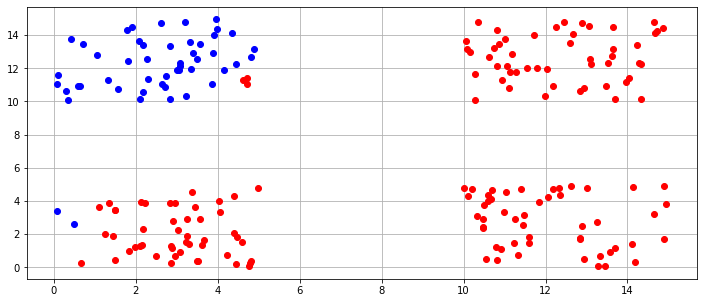

In [3]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, activation='linear') # 문제1-1
])

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x, y, epochs=10)

# 각각의 변수 명을 모두 다르게 설정했습니다.
# model.predict의 결과값 / preds_1d / pred_class 의 형태(shape)와 값들을 한번 직접 확인해보세요

preds = model.predict(x)
preds_1d = preds.flatten()
pred_class = np.where(preds_1d > 0.5, 1 , 0)

y_true = x[pred_class==1]
y_false = x[pred_class==0]

fig, ax = plt.subplots(figsize = (12,5))
ax.plot(y_true[:, 0], y_true[:,1], 'bo')
ax.plot(y_false[:,0], y_false[:,1], 'ro')
ax.grid()

### 문제 1-2
비선형성이 추가되지 않은 단층 퍼셉트론이 어떠한 결정 경계를 만드나요?

* 초평면으로 n차원 공간을 두 개의 결정 영역으로 나눔 
* 초평면이란  p차원 공간에서, 초평면은 p-1 차원인 평평한 affine 부분 공간
* 아직 무엇인지는 정확히 모르겠지만 초평면을 선형 분리 함수로 정의하며 식은 아래와 같다.

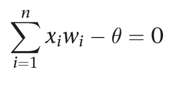

* 따라서 임계값 세타는 결정 경계를 옮기는 데 사용

## 문제2. 실제 데이터 과제
 - 아래 주어진 데이터를 신경망을 이용하여 Classification 문제를 풀어보세요.
 - 또한 머신러닝에서 배운 방법(배우지 않은 머신러닝 방법론(SVM 등)도 가능)을 이용하여 비교해보세요.

입력 데이터 샘플과 Features : 1077 샘플 x 69 Features (변수)

데이터 label: 다운증후군 (1), 정상군 (2)

데이터는 다운증후군과 정상군 마우스 피질의 핵 분획에서 검출 가능한 신호를 생성하는 69 개 단백질의 발현 수준으로 구성되어 있습니다.
라벨로는 다운증후군 1, 정상군 2로 할당되어 있습니다.


In [4]:
import pandas as pd
df = pd.read_excel("https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/MouseProtein/mouse_protein_X.xls", header=None)
df_label = pd.read_excel("https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/MouseProtein/mouse_protein_label.xls", header=None)

In [7]:
# 샘플당 100개의 특성(feature)을 가진 데이터
df.head()

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
0,0.50364,0.74719,0.43018,2.8163,5.9902,0.21883,0.17757,2.3737,0.23222,1.7509,...,0.14276,0.43096,0.24754,1.6033,2.0149,0.10823,1.04500,0.83156,0.18885,1.6757
1,0.51462,0.68906,0.41177,2.7895,5.6850,0.21164,0.17282,2.2921,0.22697,1.5964,...,0.14204,0.45716,0.25763,1.6717,2.0046,0.10975,1.00990,0.84927,0.20040,1.7436
2,0.50918,0.73025,0.41831,2.6872,5.6221,0.20901,0.17572,2.2833,0.23025,1.5613,...,0.14244,0.51047,0.25534,1.6635,2.0168,0.10820,0.99685,0.84671,0.19368,1.9264
3,0.44211,0.61708,0.35863,2.4669,4.9795,0.22289,0.17646,2.1523,0.20700,1.5951,...,0.14507,0.43100,0.25110,1.4846,1.9572,0.11988,0.99022,0.83328,0.19211,1.7006
4,0.43494,0.61743,0.35880,2.3658,4.7187,0.21311,0.17363,2.1340,0.19216,1.5042,...,0.14087,0.48123,0.25177,1.5348,2.0091,0.11952,0.99777,0.87867,0.20560,1.8397


In [8]:
print(df_label.head())
print(df_label.tail())

   0
0  1
1  1
2  1
3  1
4  1
      0
1072  2
1073  2
1074  2
1075  2
1076  2


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
label = df_label
features = df

In [11]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

In [14]:
import tensorflow as tf

In [43]:
# 이진 분류 시그모이드 사용
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid')
])
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# 둘다 같은 방법이니 편한거 사용하자

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=30)

Epoch 1/30
27/27 [==============================] - 0s 2ms/step - loss: -2.9533 - accuracy: 0.5238
Epoch 2/30
27/27 [==============================] - 0s 2ms/step - loss: -7.7476 - accuracy: 0.5238
Epoch 3/30
27/27 [==============================] - 0s 2ms/step - loss: -12.4749 - accuracy: 0.5238
Epoch 4/30
27/27 [==============================] - 0s 2ms/step - loss: -17.2065 - accuracy: 0.5238
Epoch 5/30
27/27 [==============================] - 0s 2ms/step - loss: -21.9367 - accuracy: 0.5238
Epoch 6/30
27/27 [==============================] - 0s 2ms/step - loss: -26.6649 - accuracy: 0.5238
Epoch 7/30
27/27 [==============================] - 0s 2ms/step - loss: -31.4006 - accuracy: 0.5238
Epoch 8/30
27/27 [==============================] - 0s 2ms/step - loss: -36.1284 - accuracy: 0.5238
Epoch 9/30
27/27 [==============================] - 0s 2ms/step - loss: -40.8579 - accuracy: 0.5238
Epoch 10/30
27/27 [==============================] - 0s 2ms/step - loss: -45.5882 - accuracy: 0.5238
E

In [44]:
model.evaluate(X_test, y_test, verbose=2)
# verbose 0 = 무음, 1 = 진행률 표시줄, 2 = 한 줄. "auto"대부분의 경우 기본값은 1이고 와 함께 사용할 경우 기본값은 2

7/7 - 0s - loss: -1.3624e+02 - accuracy: 0.5509 - 113ms/epoch - 16ms/step


[-136.2391815185547, 0.5509259104728699]

In [40]:
from sklearn.metrics import classification_report


In [45]:
pred = model.predict(X_test)

In [48]:
class_report = classification_report(y_test, pred, zero_division=1)
print(class_report)

              precision    recall  f1-score   support

           1       0.55      1.00      0.71       119
           2       1.00      0.00      0.00        97

    accuracy                           0.55       216
   macro avg       0.78      0.50      0.36       216
weighted avg       0.75      0.55      0.39       216



---

4-1. 사용한 모델을 입력합니다. 

4-2. Accuracy를 입력합니다. 

4-3. Precision 을 입력합니다. 

4-4. Recall 을 입력합니다. 

4-5. F1 score 를 입력합니다.

In [25]:
from sklearn.linear_model import LogisticRegression

In [27]:
model2=LogisticRegression()
model2.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [33]:
pred2 = model2.predict(X_test)

In [34]:
class_report = classification_report(y_test, pred2, zero_division=1)
print(class_report)

              precision    recall  f1-score   support

           1       0.88      0.98      0.93       119
           2       0.98      0.84      0.90        97

    accuracy                           0.92       216
   macro avg       0.93      0.91      0.91       216
weighted avg       0.92      0.92      0.92       216

